<a href="https://colab.research.google.com/github/viliturpeinen/Monte_Carlo-simulointi/blob/main/Teht%C3%A4v%C3%A4_8_Monte_Carlo_simulointi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Tulos (profit) - perusstatistiikka:
count    100000.000000
mean        705.545291
std         926.377668
min       -1314.339716
1%        -1012.811815
5%         -720.515722
10%        -514.429571
25%         -57.794695
50%         687.888255
75%        1430.188554
90%        1953.327864
95%        2219.161273
99%        2666.614019
max        3871.772122
Name: profit, dtype: float64
Todennäköisyys, että kuukausi on tappiollinen: 26.91%



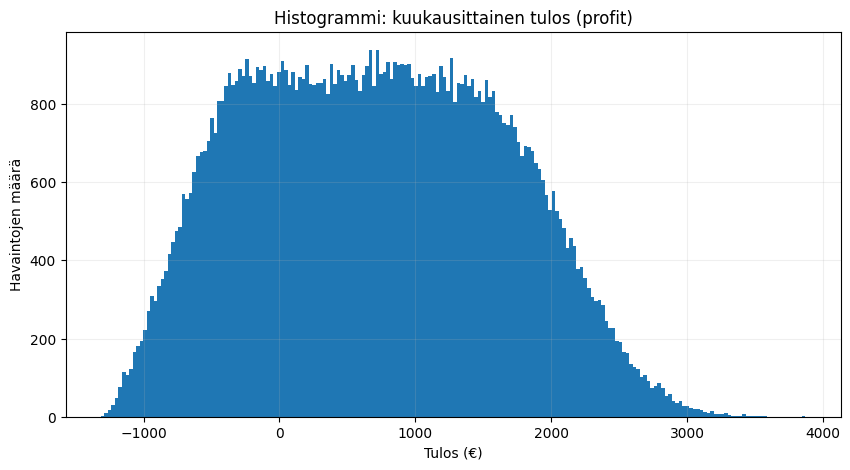

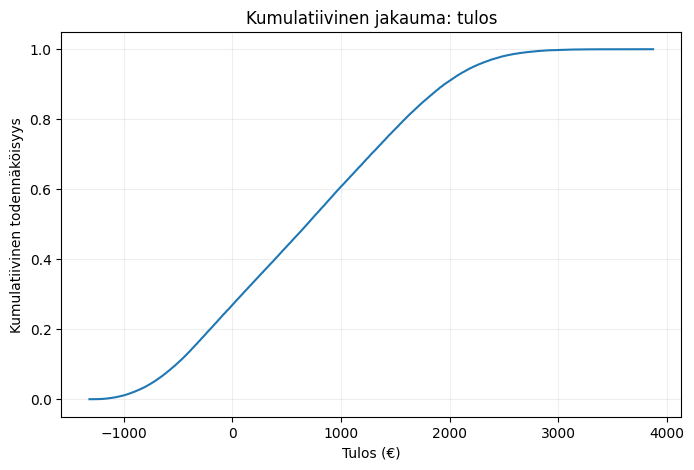

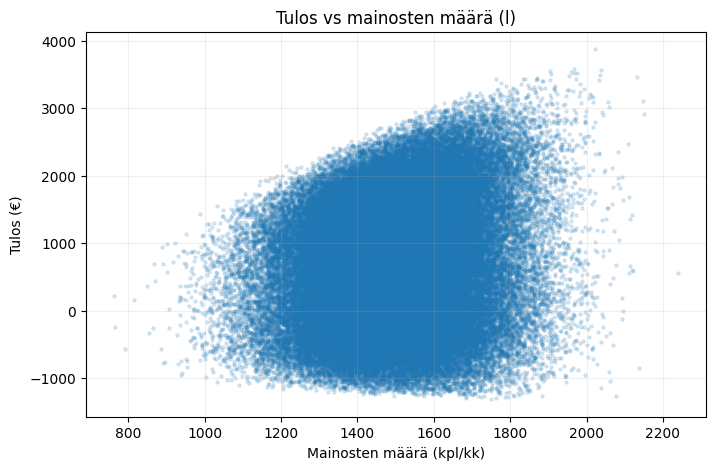

 Prosenttipisteet tulokselle (€):
  1%: -1,012.81
  5%: -720.52
 10%: -514.43
 25%: -57.79
 50%: 687.89
 75%: 1,430.19
 90%: 1,953.33
 95%: 2,219.16
 99%: 2,666.61

Keskiarvo: 705.55 €
Mediaani: 687.89 €
Hajonta: 926.38 €
Todennäköisyys, että tulos > 0 €: 73.09%
Todennäköisyys, että tulos > 2 000 €: 9.01%
Todennäköisyys, että tulos > 5 000 €: 0.00%

 Tulkinta:
Simulointien perusteella kuukausittainen odotettu tulos on noin 706 €, mediaani 688 €. Hajonta 926 €. Todennäköisyys tappiolle on 26.9%.

 Mahdollisia jatkotarkasteluja:
- Sensitiivisyysanalyysi: selvitä, mitkä muuttujat vaikuttavat eniten tuloksen vaihteluun.
- Käytä muita jakaumia (lognorm, beta) jos data ei ole normaalisti jakautunut.
- Lisää kausivaihtelu ja simuloi useita kuukausia.
- Laske riskimittareita kuten Value-at-Risk (VaR) tai Conditional VaR (CVaR).
- Optimoi mainosbudjetti tai hintastrategia tulosten perusteella.


In [1]:
# Monte Carlo -simulointi: kuukausittainen tulosarvio
# ---------------------------------------------------
# Tämä tiedosto suorittaa Monte Carlo -simuloinnin yrityksen uuden myyntituotteen
# kuukausittaisen tuloksen arvioimiseksi annettujen epävarmuustekijöiden perusteella.

#  Malli:
# Tulos = l * r * p - (l * c + h)
# missä:
# l = mainosten määrä / kk
# r = ostotapahtumaan johtavien osuus
# p = voitto / tuote
# c = kustannus / mainos
# h = kiinteät kustannukset / kk

# ---------------------------------------------------
# 1. Kirjastot ja asetukset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 2. Parametrit

RANDOM_SEED = 42
N_SIM = 100_000  # simulointien määrä

L_MEAN = 1500     # mainosten määrä (keskiarvo)
L_SD = 165        # mainosten hajonta
R_MIN, R_MAX = 0.01, 0.05  # konversioprosentin vaihteluväli
P_MIN, P_MAX = 47.0, 53.0  # voitto tuotetta kohden
C_MIN, C_MAX = 0.20, 0.80  # kustannus per mainos
H = 800.0                  # kiinteät kustannukset / kk

np.random.seed(RANDOM_SEED)

# ---------------------------------------------------
# 3. Simulointi

# Satunnaiset arvot
l = np.random.normal(L_MEAN, L_SD, N_SIM)
l = np.clip(l, 0, None)
l = np.round(l).astype(int)

r = np.random.uniform(R_MIN, R_MAX, N_SIM)
p = np.random.uniform(P_MIN, P_MAX, N_SIM)
c = np.random.uniform(C_MIN, C_MAX, N_SIM)

# Laskenta
revenue = l * r * p
costs = l * c + H
profit = revenue - costs

results = pd.DataFrame({
    "l": l,
    "r": r,
    "p": p,
    "c": c,
    "revenue": revenue,
    "costs": costs,
    "profit": profit
})

# ---------------------------------------------------
# 4. Perusstatistiikka

summary = results["profit"].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.90,0.95,0.99])
prob_loss = np.mean(results["profit"] < 0)

print(" Tulos (profit) - perusstatistiikka:")
print(summary)
print(f"Todennäköisyys, että kuukausi on tappiollinen: {prob_loss:.2%}\n")

# ---------------------------------------------------
# 5. Visualisoinnit

plt.figure(figsize=(10,5))
plt.hist(results["profit"], bins=200)
plt.title("Histogrammi: kuukausittainen tulos (profit)")
plt.xlabel("Tulos (€)")
plt.ylabel("Havaintojen määrä")
plt.grid(alpha=0.2)
plt.show()

# Kumulatiivinen jakauma (CDF)
sorted_profit = np.sort(results["profit"])
cdf = np.linspace(0,1,len(sorted_profit))
plt.figure(figsize=(8,5))
plt.plot(sorted_profit, cdf)
plt.title("Kumulatiivinen jakauma: tulos")
plt.xlabel("Tulos (€)")
plt.ylabel("Kumulatiivinen todennäköisyys")
plt.grid(alpha=0.2)
plt.show()

# Hajontakuva (tulos vs mainosten määrä)
plt.figure(figsize=(8,5))
plt.scatter(results["l"], results["profit"], s=5, alpha=0.15)
plt.title("Tulos vs mainosten määrä (l)")
plt.xlabel("Mainosten määrä (kpl/kk)")
plt.ylabel("Tulos (€)")
plt.grid(alpha=0.2)
plt.show()

# ---------------------------------------------------
# 6. Lisäanalyysi ja tulkinta

mean_profit = results["profit"].mean()
median_profit = results["profit"].median()
std_profit = results["profit"].std()

percentiles = np.percentile(results["profit"], [1,5,10,25,50,75,90,95,99])
print(" Prosenttipisteet tulokselle (€):")
for pctl, val in zip([1,5,10,25,50,75,90,95,99], percentiles):
    print(f"{pctl:>3}%: {val:,.2f}")

print(f"\nKeskiarvo: {mean_profit:,.2f} €")
print(f"Mediaani: {median_profit:,.2f} €")
print(f"Hajonta: {std_profit:,.2f} €")
print(f"Todennäköisyys, että tulos > 0 €: {np.mean(profit > 0):.2%}")
print(f"Todennäköisyys, että tulos > 2 000 €: {np.mean(profit > 2000):.2%}")
print(f"Todennäköisyys, että tulos > 5 000 €: {np.mean(profit > 5000):.2%}\n")

# Tulkinta
print(" Tulkinta:")
print(f"Simulointien perusteella kuukausittainen odotettu tulos on noin {mean_profit:,.0f} €, "
      f"mediaani {median_profit:,.0f} €. Hajonta {std_profit:,.0f} €. "
      f"Todennäköisyys tappiolle on {prob_loss:.1%}.\n")

# ---------------------------------------------------
# 7. Vinkkejä jatkotarkasteluihin

print(' Mahdollisia jatkotarkasteluja:')
print('- Sensitiivisyysanalyysi: selvitä, mitkä muuttujat vaikuttavat eniten tuloksen vaihteluun.')
print('- Käytä muita jakaumia (lognorm, beta) jos data ei ole normaalisti jakautunut.')
print('- Lisää kausivaihtelu ja simuloi useita kuukausia.')
print('- Laske riskimittareita kuten Value-at-Risk (VaR) tai Conditional VaR (CVaR).')
print('- Optimoi mainosbudjetti tai hintastrategia tulosten perusteella.')